# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

In [3]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [4]:
df.shape

(81937, 15)

In [5]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [6]:
# Each row is a dog
# "Animal Name" is the name of the dog
# "Animal Gender" is the gender of the dog

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [7]:
# 1 - What's the most common breed of dog?
# 2 - What's the average age of a dogs?
# 3 - How many dogs are trained?
# 4 - What percent is male and what percent is female?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:>

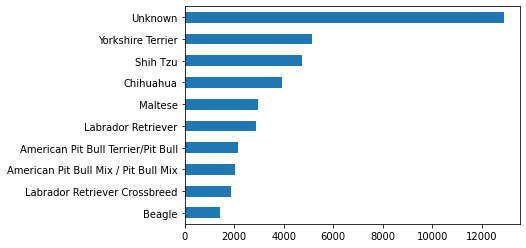

In [8]:
df["Primary Breed"].value_counts().head(10).sort_values(ascending=True).plot(kind="barh")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

In [46]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values="Unknown")

<AxesSubplot:>

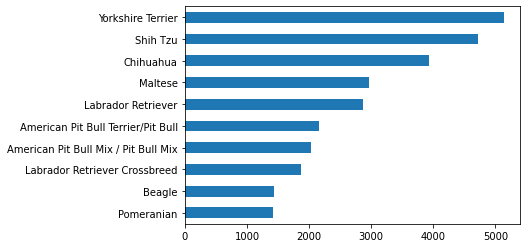

In [57]:
df["Primary Breed"].value_counts().head(10).sort_values(ascending=True).plot(kind="barh")

## What are the most popular dog names?

In [60]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values="UNKNOWN")

In [61]:
df["Animal Name"].value_counts().head(10)

Bella      527
Max        515
Charlie    403
Lola       387
Unknown    379
Rocky      354
Lucy       338
unknown    337
Coco       308
Buddy      300
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [11]:
len(df[df["Animal Name"] == "Andrew"])

5

In [12]:
len(df[df["Animal Name"] == "Max"])

515

In [13]:
len(df[df["Animal Name"] == "Maxwell"])

30

## What percentage of dogs are guard dogs?

In [14]:
(len(df[df["Guard or Trained"] == "Yes"]) / df.shape[0]) * 100

0.06224294274869717

## What are the actual numbers?

In [15]:
len(df[df["Guard or Trained"] == "Yes"])

51

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [62]:
df["Guard or Trained"]

0         No
1         No
2        NaN
3         No
4        NaN
        ... 
81932    NaN
81933    NaN
81934     No
81935     No
81936     No
Name: Guard or Trained, Length: 81937, dtype: object

In [16]:
len(df[df["Guard or Trained"] == "Yes"]) + len(df[df["Guard or Trained"] == "No"])

49576

In [17]:
df["Guard or Trained"].value_counts()

No     49525
Yes       51
Name: Guard or Trained, dtype: int64

In [18]:
df["Guard or Trained"].value_counts().sum()

49576

## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [93]:
# df = df.dropna(subset=['Treatment_Date'])
# df.dropna()
# df["Guard or Trained"].head(100).sample(100)
# df["Guard or Trained"].replace("NaN", "No").value_counts()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
58,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14
67,10065,TEDDY,M,Unknown,SCHNOODLE,BLACK,GRAY,WHITE,2008-01-01,Yes,No,Yes,2014-09-16 06:03:25.840,2014-09-16,2017-10-29,2008,14
74,10023,Nala,F,Unknown,Jack Russell Terrier/Catahoula,BLUE MERLE,GRAY,WHITE,2013-04-01,Yes,No,Yes,2014-09-16 12:28:09.460,2014-09-16,2017-10-31,2013,9
130,10021,Gunther,M,Unknown,Boxer Mix,WHITE,BROWN,BLACK,2010-05-01,Yes,No,Yes,2014-09-19 15:10:37.897,2014-09-19,2016-09-23,2010,12
184,10466,Jade,F,Unknown,Boxer/Lab,TAN,BLOND,BROWN,2009-09-01,Yes,No,Yes,2014-09-23 11:48:24.647,2014-09-23,2016-10-02,2009,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81557,10455,Cody,M,Unknown,Golden Retriever Mix,BLACK,BROWN,WHITE,2004-07-01,Yes,No,Yes,2016-04-26 19:15:21.407,2016-04-26,2017-04-29,2004,18
81649,10312,ELLA,F,Unknown,MORKIE,TAN,WHITE,BLOND,2010-06-01,Yes,No,Yes,2016-04-27 10:20:16.437,2016-04-27,2017-03-27,2010,12
81740,11231,D-Block,M,Unknown,Pit Bull,BROWN,TAN,WHITE,2003-10-01,Yes,No,Yes,2016-04-27 14:15:52.310,2016-04-27,2017-05-31,2003,19
81871,11211,Sasha,F,Unknown,SHEPHERD TERR X,BLACK,TAN,WHITE,2003-01-01,Yes,No,Yes,2016-04-28 11:18:57.467,2016-04-28,2017-05-30,2003,19


## What are the top dog breeds for guard dogs? 

In [95]:
import numpy as np

In [148]:
df[df["Guard or Trained"] == "Yes"]["Primary Breed"].replace("Unknown", np.nan).dropna().value_counts().head(10)

German Shepherd Dog                     4
Chihuahua                               3
Labrador Retriever                      3
Rottweiler                              3
American Pit Bull Mix / Pit Bull Mix    3
Shih Tzu                                2
Staffordshire Bull Terrier              2
Poodle, Standard                        1
Beagle Crossbreed                       1
Weimaraner                              1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [83]:
df["year"] = df["Animal Birth"].apply(lambda birth: birth.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [22]:
import datetime

In [23]:
current_year = datetime.datetime.now().year
current_year

2022

In [89]:
df["age"] = current_year - df["year"]

In [90]:
df.head(1)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [124]:
df_n = pd.read_csv("zipcodes-neighborhoods.csv", na_values="Unknown")

In [125]:
merged = df.merge(df_n, left_on="Owner Zip Code", right_on="zip")
merged.head(2)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

You'll want to do these separately, and filter for each.

In [179]:
merged[merged["borough"] == "Bronx"]["Animal Name"].mode()

0    Rocky
Name: Animal Name, dtype: object

In [165]:
#### FIX
merged[merged["borough"] == "Brooklyn"]["Animal Name"].value_counts()

unknown                        234
Unknown                        161
Max                            113
Bella                          112
Charlie                         96
                              ... 
COSITA                           1
Novimba                          1
mushka                           1
Charlie Barker Weiss Harris      1
COAL                             1
Name: Animal Name, Length: 9813, dtype: int64

In [182]:
merged[merged["neighborhood"] == "Upper East Side"]["Animal Name"].mode()

0    Lucy
Name: Animal Name, dtype: object

## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [196]:
merged.groupby("neighborhood")["Primary Breed"].value_counts()

neighborhood  Primary Breed        
Borough Park  Unknown                  287
              Yorkshire Terrier        115
              Shih Tzu                 100
              Chihuahua                 86
              Maltese                   83
                                      ... 
West Queens   Smooth Fox Terrier         1
              Tibetan Mastiff            1
              Tibetan Terrier            1
              Vizsla                     1
              Welsh Corgi, Cardigan      1
Name: Primary Breed, Length: 5639, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

In [211]:
merged[merged["Spayed or Neut"] == "Yes"]["Primary Breed"].value_counts().tail(5)

Grand Basset Griffon Vendeen    1
Hamiltonstovare                 1
Leonberger                      1
Small Munsterlander Pointer     1
Tibetan Mastiff                 1
Name: Primary Breed, dtype: int64

In [212]:
merged[(merged["Spayed or Neut"] == "Yes") & (merged["Animal Gender"] == "M")]["Primary Breed"].value_counts().tail(5)

Grand Basset Griffon Vendeen    1
Dogue de Bordeaux               1
Leonberger                      1
Mastiff, Neapolitan             1
Bull Dog, American              1
Name: Primary Breed, dtype: int64

In [213]:
merged[(merged["Spayed or Neut"] == "Yes") & (merged["Animal Gender"] == "F")]["Primary Breed"].value_counts().tail(5)

American English Coonhound    1
Dandie Dinmont Terrier        1
Pyrenean Shepherd             1
Spanish Water Dog             1
Scottish Deerhound            1
Name: Primary Breed, dtype: int64

## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [45]:
merged["monochrome"] = "True"
merged.head(1)

## SEARCH TWO COLUMNS WITH CONDITIONAL VALUES
df[['Animal Dominant Color','Animal Secondary Color','Animal Third Color']].head(1)
# df[['Animal Dominant Color','Animal Secondary Color','Animal Third Color']] [df['Promoted'] == True]

# Animal Secondary Color
# Animal Third Color

# len(df[df["Animal Dominant Color"] == "BLACK"])
# df[(df["Animal Dominant Color"] == "Black") | (df["Animal Dominant Color"] == "White") | (df["Animal Dominant Color"] == "Grey")]


,Animal Dominant Color,Animal Secondary Color,Animal Third Color
0,BROWN,BLACK,NaN


## How many dogs are in each borough? Plot it in a graph.

In [221]:
# merged.groupby(by="borough").value_counts().hist()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [117]:
df_boro = pd.read_csv("boro_population.csv")

In [118]:
merged = merged.merge(df_boro, left_on="borough", right_on="borough")

In [113]:
# merged["borough"].value_counts() / merged["population"]

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [222]:
merged.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,11,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,11,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,15,Upper West Side,10024,Manhattan


<AxesSubplot:>

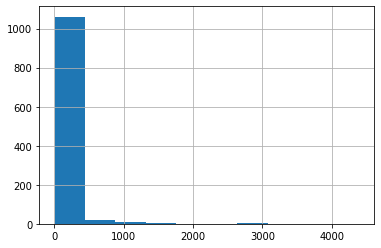

In [229]:
merged.groupby("borough")["Primary Breed"].value_counts().hist()